## Загрузка набора данных

In [2]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [3]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [4]:
print(train_targets)

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 21.1 13.6
 32.2 13.1

In [5]:
import pandas as pd
df = pd.DataFrame(train_data)

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79


## Стандартизация данных (масштабирование по среднему значению)

In [7]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

## Определение модели

In [8]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

## Перекрестная проверка по K-блокам

In [13]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]

    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                          train_data[(i+1)*num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                          train_targets[(i+1)*num_val_samples:]], axis=0)
    
    model = build_model()

    model.fit(partial_train_data, partial_train_targets,
              epochs = num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [10]:
print(all_scores)
print(np.mean(all_scores))

[1.8265008926391602, 2.7447004318237305, 2.3514485359191895, 2.4916532039642334]
2.3535757660865784


## Сохранение оценки проверки перед каждым прогоном

In [16]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]

    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                          train_data[(i+1)*num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                          train_targets[(i+1)*num_val_samples:]], axis=0)
    
    model = build_model()

    history = model.fit(partial_train_data, partial_train_targets,
              epochs = num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [15]:
history.history.keys()

dict_keys(['loss', 'mae'])

In [17]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

<function matplotlib.pyplot.show>

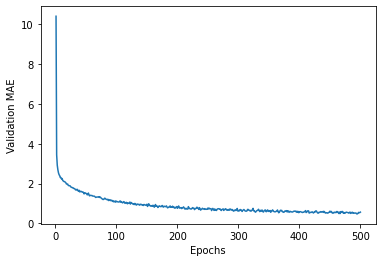

In [18]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show

## Формирование графика с оценками проверок без первых 10 замеров

<function matplotlib.pyplot.show>

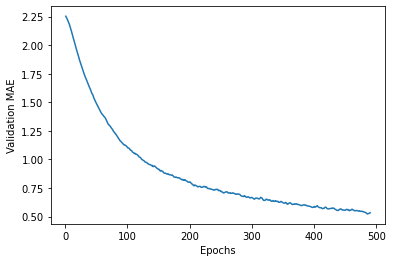

In [19]:
# Функция слгаживания экспоненциальной скользящей средней
def smooth_curve(points, factor=0.9):
    smoothed_points=[]
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

# Срез с 10й точки и сглаживание
smooth_mae_history = smooth_curve(average_mae_history[10:])
#График
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show

In [20]:
model = build_model()
model.fit(train_data, train_targets,
              epochs = 1000, batch_size=16, verbose=1)
test_mse, test_mae = model.evaluate(test_data, test_targets)

Epoch 1/1000
26/26 [==============================] - 1s 3ms/step - loss: 553.2994 - mae: 21.6940
Epoch 2/1000
26/26 [==============================] - 0s 3ms/step - loss: 426.7309 - mae: 18.5230
Epoch 3/1000
26/26 [==============================] - 0s 3ms/step - loss: 228.6290 - mae: 12.5583
Epoch 4/1000
26/26 [==============================] - 0s 3ms/step - loss: 78.1618 - mae: 6.7391
Epoch 5/1000
26/26 [==============================] - 0s 3ms/step - loss: 43.6555 - mae: 4.9846
Epoch 6/1000
26/26 [==============================] - 0s 3ms/step - loss: 30.2815 - mae: 3.9580
Epoch 7/1000
26/26 [==============================] - 0s 3ms/step - loss: 25.0102 - mae: 3.5881
Epoch 8/1000
26/26 [==============================] - 0s 3ms/step - loss: 22.0815 - mae: 3.4210
Epoch 9/1000
26/26 [==============================] - 0s 3ms/step - loss: 20.0984 - mae: 3.1894
Epoch 10/1000
26/26 [==============================] - 0s 3ms/step - loss: 18.6917 - mae: 3.0115
Epoch 11/1000
26/26 [============

In [21]:
test_mae

2.4684274196624756